# Create 10kmx10km Grid
1. Load 2011 Census shapefile
2. Create 10km x 10 km grid
3. Export to geojson

In [ ]:
# import dependencies
!pip install -r https://raw.githubusercontent.com/anujavenkatachalam04/chvi_vbd_rj/main/requirements.txt

In [8]:
import os
import pandas as pd
import geopandas as gpd
import requests
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import geopandas as gpd
from shapely.geometry import Point
import uuid

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
os.chdir("/content/drive/MyDrive/CHVI")

In [128]:
# Import shapefile
blocks_shp=gpd.read_file("5_Shapefiles/SUBDISTRICT_11/Rajasthan_Blocks.shp")

In [129]:
blocks_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

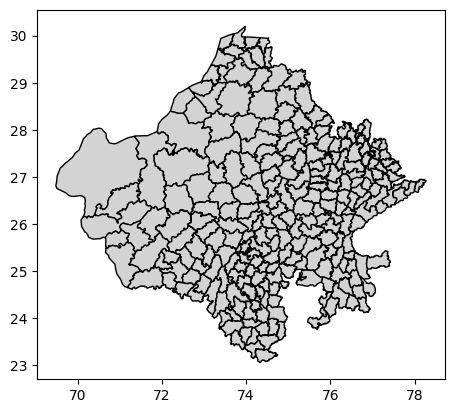

In [130]:
blocks_shp.plot(color="lightgrey", edgecolor="black")

#Climate - Create 10km x 10km grid

In [131]:
# Project to UTM zone for India (EPSG:32643 for Rajasthan)
blocks_metric = blocks_shp.to_crs(epsg=32643)

In [133]:
# Create 10km x 10km grid
minx, miny, maxx, maxy = blocks_metric.total_bounds

x_coords = np.arange(minx, maxx + 10000, 10000)
y_coords = np.arange(miny, maxy + 10000, 10000)

points = [Point(x, y) for x in x_coords for y in y_coords]
grid = gpd.GeoDataFrame(geometry=points, crs=blocks_metric.crs)


In [135]:
# Clip against shape file
grid_clipped = grid[grid.intersects(blocks_metric.unary_union)]

/tmp/ipython-input-3495576661.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  grid_clipped = grid[grid.intersects(blocks_metric.unary_union)]


In [136]:
# Change crs back to 4326
grid_clipped = grid_clipped.to_crs(epsg=4326)

In [138]:
grid_clipped.to_file("5_Shapefiles/Rajasthan_10kmx10km_grid.geojson", driver="GeoJSON")

In [ ]:
# The End!